In [1]:
# imports: 
import torch
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(0);

## Using advanced optimization algorithms

We will use gradient-based optimization to find roots of the quadratic function:  $$f(a)=a^2-2a+1=0.$$

In [2]:
# Define a learning rate 'lr' with value 0.1
lr = 0.1

# Here's an empty list to store the value of loss at every iteration
loss_history = []

# Initialize 'a' as a tensor of dimension 1, and initial guess value of 0.
a = torch.tensor([0.])

# Since, we want to find the value of a using optimization, set .requires_grad to True for a
a.requires_grad = True

# We create an optimizer here that will do the job for gradient-optimization for us 
# Adam is a famous optimizer with adaptive gradient descent techinque for faster convergence.
# Documentation: https://pytorch.org/docs/stable/generated/torch.optim.Adam.html
# Other optimizers include -- 
# SGD (Stochastic gradient descent), 
# LBFGS (limited-memory Broyden–Fletcher–Goldfarb–Shanno), etc.
optimizer = torch.optim.Adam([a], lr=lr)

# begin iterating over 5000 steps:
for i in range(5000):
    
    # predict f:
    f = a**2 - 2*a + 1
    
    # Compute the loss. Use the squared value of f as loss. 
    loss = f**2
    
    # store the loss in a list using loss_history.append(). Use loss.detach().item() to only store the numerical value
    loss_history.append(loss.detach().item())
    
    # Call .backward() on loss to compute gradient (d_loss/d_a)
    loss.backward()
    
    # Turn off gradient tracking to not connect graph starting from 'a' back to 'a'
    with torch.no_grad():
        
        # Instead of updating the value of 'a' ourselves, let optimizer do it for us
        optimizer.step()
    
    # remove any pre-exisitng gradients stored
    optimizer.zero_grad()  
    

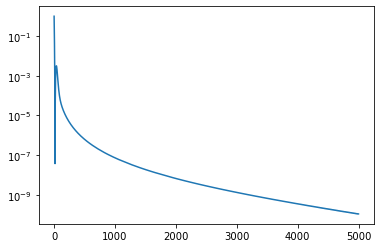

In [3]:
# Plot loss history
plt.plot(loss_history)
plt.yscale('log')

***Root of the polynomial***

In [4]:
print(a) #The answer should be close to 1.0

tensor([1.0032], requires_grad=True)


-----

## Questions?